## quantitative analysis for META


In [1]:
from load import load_data
from indicators import indicators
from indicators import summary
from q_plot import quantiattive
import pandas as pd
import yfinance as yf
import talib
import matplotlib.pyplot as plt

In [2]:
df=load_data(r'C:\Users\ASUS VIVO\Desktop\data\NVDA_historical_data.csv')

Prepare Your Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6421 non-null   object 
 1   Open          6421 non-null   float64
 2   High          6421 non-null   float64
 3   Low           6421 non-null   float64
 4   Close         6421 non-null   float64
 5   Adj Close     6421 non-null   float64
 6   Volume        6421 non-null   int64  
 7   Dividends     6421 non-null   float64
 8   Stock Splits  6421 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 451.6+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6421 non-null   datetime64[ns]
 1   Open          6421 non-null   float64       
 2   High          6421 non-null   float64       
 3   Low           6421 non-null   float64       
 4   Close         6421 non-null   float64       
 5   Adj Close     6421 non-null   float64       
 6   Volume        6421 non-null   int64         
 7   Dividends     6421 non-null   float64       
 8   Stock Splits  6421 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 451.6 KB


Calculate Basic Technical Indicators

In [6]:
indicators(data=df,open='Open',high='High',low='Low',close='Close')


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_open,...,Lower_Band_open,Upper_Band_high,Middle_Band_high,Lower_Band_high,Upper_Band_low,Middle_Band_low,Lower_Band_low,Upper_Band_close,Middle_Band_close,Lower_Band_close
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,125.458999,...,116.262308,136.656425,127.5185,118.380575,132.107448,122.768000,113.428553,134.369831,124.9165,115.463170
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,124.804499,...,114.145142,137.230934,126.9440,116.657066,133.734414,121.953000,110.171586,135.113151,124.2105,113.307849
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,124.409000,...,113.106837,137.738731,126.4335,115.128268,133.989515,121.386000,108.782486,135.602600,123.6640,111.725400
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,123.864500,...,111.636398,137.977884,125.8620,113.746116,134.136823,120.813501,107.490178,136.114695,123.0665,110.018306


summary for the data

In [7]:
summary(data=df)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_open,RSI_open,...,Lower_Band_open,Upper_Band_high,Middle_Band_high,Lower_Band_high,Upper_Band_low,Middle_Band_low,Lower_Band_low,Upper_Band_close,Middle_Band_close,Lower_Band_close
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6421.000000,6421.000000,6402.000000,6407.000000,...,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000
mean,6.207884,6.320466,6.085095,6.207702,6.181334,6.060791e+08,0.000025,0.003348,6.047541,53.461628,...,5.397001,6.799713,6.158075,5.516437,6.566159,5.930506,5.294854,6.697905,6.050654,5.403404
std,16.138328,16.424862,15.794914,16.118517,16.121352,4.323482e+08,0.000316,0.142397,15.514510,12.593350,...,13.818147,17.525780,15.796552,14.116136,16.879064,15.201221,13.562544,17.235781,15.517411,13.842911
min,0.034896,0.035547,0.033333,0.034115,0.031291,1.968000e+07,0.000000,0.000000,0.035938,17.047468,...,0.031185,0.038149,0.036413,0.031635,0.036745,0.035200,0.030540,0.037454,0.035742,0.031128
25%,0.277500,0.286250,0.269500,0.276750,0.253843,3.456350e+08,0.000000,0.000000,0.277760,44.497313,...,0.235792,0.320643,0.284669,0.245442,0.305617,0.270419,0.229515,0.313924,0.277625,0.236470
50%,0.457250,0.464750,0.450750,0.457000,0.427637,5.070000e+08,0.000000,0.000000,0.458756,53.704292,...,0.419705,0.497797,0.465162,0.429575,0.486853,0.452017,0.413191,0.493468,0.458412,0.420047
75%,4.182500,4.235750,4.116500,4.175000,4.130434,7.362000e+08,0.000000,0.000000,4.147775,62.156753,...,3.785380,4.619027,4.202722,3.849051,4.489167,4.082334,3.722188,4.556089,4.144266,3.795428
max,139.800003,140.759995,132.419998,135.580002,135.580002,9.230856e+09,0.010000,10.000000,128.017000,92.846701,...,118.066764,142.397647,130.601000,121.717568,136.051273,125.225001,117.050634,139.306854,127.787001,119.530639


In [8]:
column=summary(data=df).columns.tolist()
column

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'SMA_open',
 'RSI_open',
 'SMA_high',
 'RSI_high',
 'SMA_low',
 'RSI_low',
 'SMA_close',
 'RSI_close',
 'Upper_Band_open',
 'Middle_Band_open',
 'Lower_Band_open',
 'Upper_Band_high',
 'Middle_Band_high',
 'Lower_Band_high',
 'Upper_Band_low',
 'Middle_Band_low',
 'Lower_Band_low',
 'Upper_Band_close',
 'Middle_Band_close',
 'Lower_Band_close']

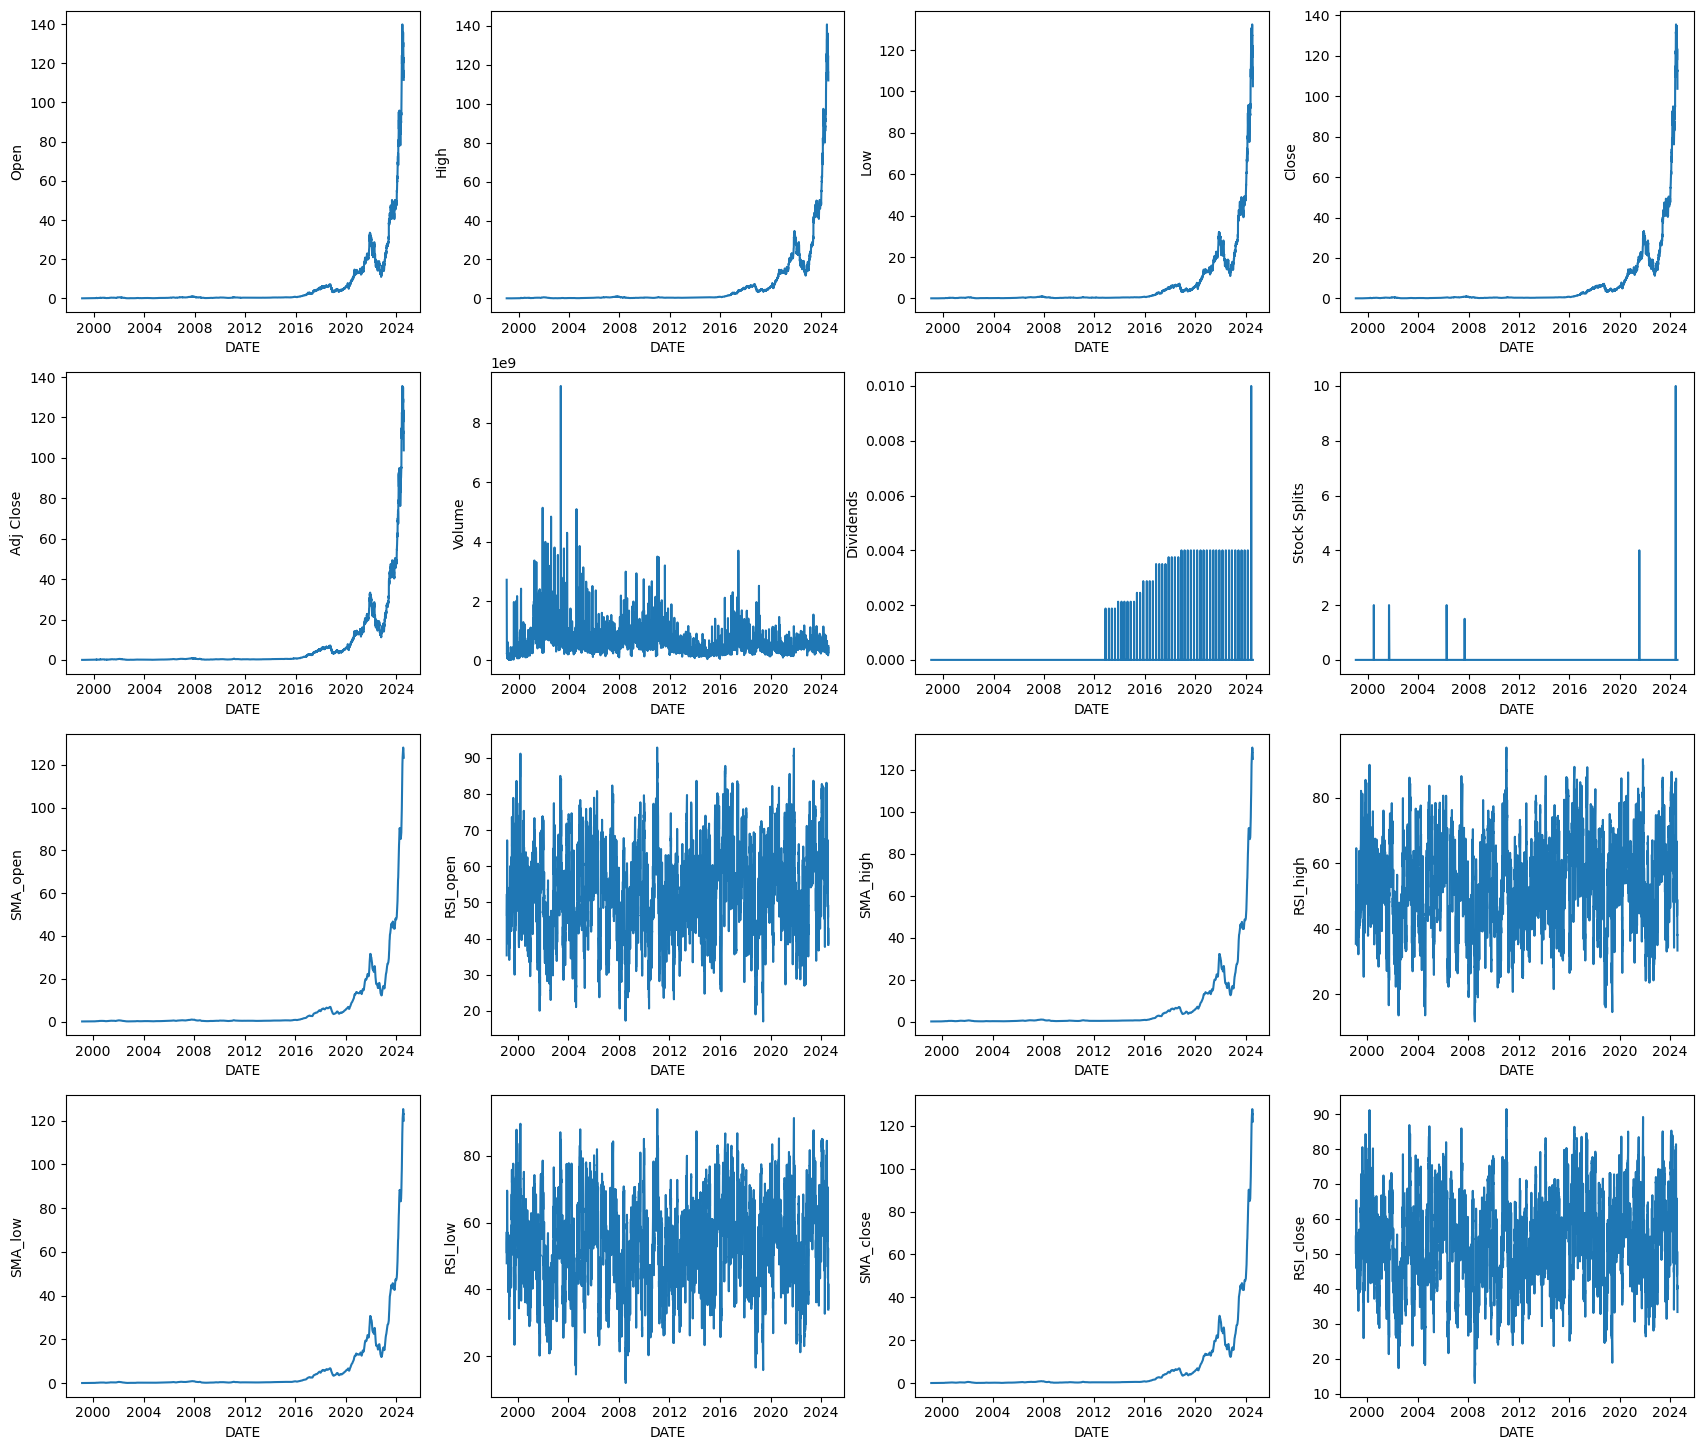

In [9]:
quantiattive(data=df,column=column)